In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam, RMSprop,Adadelta
from tensorflow.keras.callbacks import EarlyStopping
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
import xgboost as xgb

In [2]:
DIR = 'G:/News Popularity/OnlineNewsPopularity'
df = pd.read_csv(DIR+'/OnlineNewsPopularity.csv')

In [3]:
df.head(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df.isnull().any()

url                              False
 timedelta                       False
 n_tokens_title                  False
 n_tokens_content                False
 n_unique_tokens                 False
                                 ...  
 title_subjectivity              False
 title_sentiment_polarity        False
 abs_title_subjectivity          False
 abs_title_sentiment_polarity    False
 shares                          False
Length: 61, dtype: bool

In [5]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [6]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [7]:
df['target'] = df[' shares']
    

In [8]:
#  Creating a new target variable, based on the mean value of ' shares' column.
for i in range(len(df)):
    if(df[' shares'].iloc[i]>1400):
        df['target'].iloc[i] = 1
    else:
        df['target'].iloc[i]=0

C:\ProgramData\Anaconda3\envs\tf_gpu_env\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


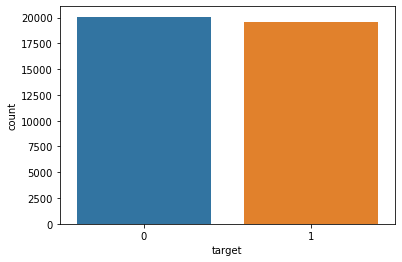

In [9]:
sns.countplot(df['target'])
# Balanced Target Variable!! 

In [10]:
df.drop([' shares'],inplace=True,axis=1)

In [11]:
X = df.drop(['url',' timedelta','target'],axis=1)
y = df['target']

In [12]:
# X.columns.to_list()

In [13]:
s = StandardScaler()
X_scaled = s.fit_transform(X)

In [14]:
print(X_scaled[0].shape)

(58,)


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [16]:
xg = XGBClassifier(seed=42,objective='binary:logistic')
xg.fit(X_train,y_train)

# make predictions for test data
y_pred = xg.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.6522890654559212


--------------------------------------------------
Feeding Data
--------------------------------------------------
Start Training
--------------------------------------------------
Start Predicting
Accuracy=>
0.673603228654307
F1-score=>
0.6413425263431768
ROC-AUC-Score=>
0.6732931763986743
--------------------------------------------------


<Figure size 3600x3600 with 0 Axes>

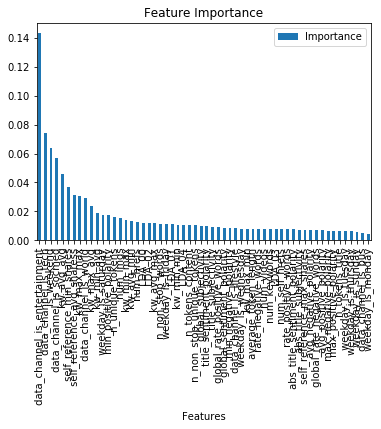

[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', ' rate_negative_words'

In [17]:
def xgb_clf(X_train,X_test,y_train,y_test,useTrainCV=True,cv_folds = 5,early_stopping_rounds=100):
    DIVIDER = '-'*50
    alg = XGBClassifier(learning_rate=0.1,seed=42,objective='binary:logistic',n_estimators=1000,gamma=0,max_depth=4)
    if useTrainCV:
        print(DIVIDER)
        print("Feeding Data")
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(X_train,label=y_train)
        cvresult = xgb.cv(xgb_param,xgtrain,num_boost_round=alg.get_params()['n_estimators'],nfold=cv_folds,
                         early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
        
    print(DIVIDER)
    print('Start Training')
    alg.fit(X_train,y_train,eval_metric='error',verbose=True)
    
    print(DIVIDER)
    print('Start Predicting')
    pred = alg.predict(X_test)
    print("Accuracy=>")
    print(accuracy_score(y_test,pred))
    print("F1-score=>")
    print(f1_score(y_test,y_pred))
    print("ROC-AUC-Score=>")
    print(roc_auc_score(y_test,pred))
    
    print(DIVIDER)
    fig = plt.figure(figsize=(50,50))
    feat_imp = alg.feature_importances_
    feat= X.columns.tolist()
    res_df = pd.DataFrame({'Features':feat,'Importance':feat_imp}).sort_values(by='Importance',ascending=False)
    res_df.plot('Features','Importance',kind='bar',title='Feature Importance')
    plt.show()
    print(feat)
    return pred

xgb_pred = xgb_clf(X_train,X_test,y_train,y_test)

In [18]:
es = EarlyStopping(patience=10,monitor='val_loss',restore_best_weights=True)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(input_shape=(58,),activation='relu',units=58,kernel_initializer='normal'),
    tf.keras.layers.Dense(64,activation='relu',kernel_initializer='normal'),
    tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid',kernel_initializer='normal')
])
opt = Adam(lr=0.01,decay=1e-6)

model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=50,batch_size=64,validation_data=(X_test,y_test),callbacks=[es])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 31715 samples, validate on 7929 samples
Epoch 1/50
31715/31715 [==============================] - 4s 112us/sample - loss: 0.6425 - acc: 0.6388 - val_loss: 0.6312 - val_acc: 0.6417
Epoch 2/50
31715/31715 [==============================] - 2s 52us/sample - loss: 0.6293 - acc: 0.6470 - val_loss: 0.6279 - val_acc: 0.6522
Epoch 3/50
31715/31715 [==============================] - 2s 51us/sample - loss: 0.6249 - acc: 0.6524 - val_loss: 0.6285 - val_acc: 0.6494
Epoch 4/50
31715/31715 [==============================] - 2s 52us/sample - loss: 0.6216 - acc: 0.6531 - val_loss: 0.6241 - val_acc: 0.6530
Epoch 5/50
31715/31715 [==============================] - 2s 50us/sample - loss: 0.6191 - acc: 0.6544 - val_loss: 0.6224 - val_acc: 0.6506
Epoch 6/50
31715/31715 [===================

In [19]:
dnn_pred = model.predict(X_test)

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


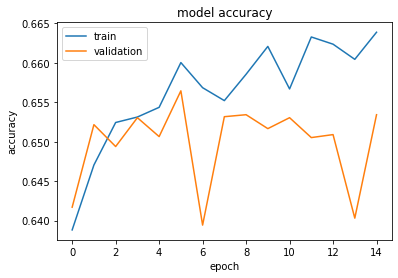

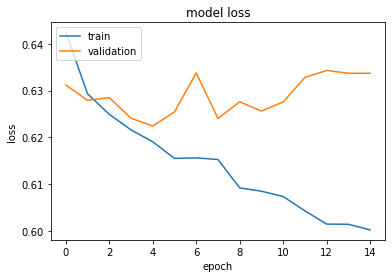

In [20]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()